# Association Rule Learning
- Support
- Confidence
- Lift

## Types of Association
- Apriori
- Eclat
- F-P Growth Algorithm

# Apriori Algorithm Learning

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("mall_transactions.csv")
dataset.shape

(10000, 11)

In [3]:
dataset.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11
0,Apples,Apples,Soap,Chocolate,Onions,Soap,Water,Tomatoes,Chips,Milk,Toothpaste
1,Cheese,Bread,Rice,Tomatoes,Beef,Water,Pasta,Eggs,Chocolate,Chips,Pasta
2,Oranges,Apples,Detergent,Cereal,Bread,Chips,Toothpaste,Coffee,Onions,Soap,Beef
3,Chocolate,Bananas,Chips,Tissue,Fish,Tissue,Detergent,Butter,Butter,Tea,Tissue
4,Shampoo,Shampoo,Fish,Coffee,Tea,Coffee,Eggs,Eggs,Water,Cookies,Bananas


In [4]:
dataset.tail()

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11
9995,Butter,Water,Soda,Coffee,Beef,Pasta,Juice,Apples,Fish,Rice,Eggs
9996,Tomatoes,Soda,Rice,Bread,Yogurt,Shampoo,Water,Bread,Bread,Bananas,Tissue
9997,Cookies,Tissue,Juice,Chocolate,Onions,Shampoo,Onions,Tomatoes,Butter,Soda,Soap
9998,Bread,Tea,Shampoo,Cheese,Oranges,Yogurt,Oranges,Soap,Beef,Eggs,Water
9999,Soda,Juice,Tomatoes,Eggs,Oranges,Onions,Eggs,Soda,Onions,Coffee,Cereal


In [5]:
dataset.isnull().sum()

item1     0
item2     0
item3     0
item4     0
item5     0
item6     0
item7     0
item8     0
item9     0
item10    0
item11    0
dtype: int64

In [6]:
dataset=pd.read_csv("mall_trans.csv")
dataset.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11
0,Toothpaste,Beef,Chips,Soda,Eggs,NaN,Juice,Cookies,NaN,Rice,Coffee
1,Apples,NaN,Apples,Butter,Juice,Yogurt,Oranges,NaN,NaN,NaN,NaN
2,Rice,Cookies,Milk,Milk,NaN,Cereal,NaN,Oranges,Tomatoes,Oranges,Tea
3,Soap,Eggs,Bananas,NaN,Detergent,Cereal,Rice,Soap,Beef,Pasta,NaN
4,Apples,Detergent,Tea,Yogurt,Detergent,Yogurt,Shampoo,Eggs,Pasta,NaN,NaN


In [7]:
dataset.isnull().sum()

item1     1996
item2     1913
item3     2024
item4     2020
item5     1996
item6     1974
item7     2056
item8     1992
item9     2008
item10    2019
item11    1994
dtype: int64

In [8]:
dataset.columns

Index(['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8',
       'item9', 'item10', 'item11'],
      dtype='object')

In [9]:
dataset['item1'][0]

'Toothpaste'

In [10]:
# nan is floating content
type(dataset['item5'][2])

float

In [12]:
market = []
for i in range(0, dataset.shape[0]):
    cus = []
    for j in dataset.columns:
        if type(dataset[j][i])==str:
            cus.append(dataset[j][i])
    market.append(cus)

In [15]:
import collections

In [16]:
collections.Counter(['a', 'a', 'c', 'd', 'd', 'e'])

Counter({'a': 2, 'd': 2, 'c': 1, 'e': 1})

In [17]:
import numpy as np

In [19]:
# since its list in list so we need to make it single list
l = []
for i in market:
    for j in i:
        l.append(j)

In [21]:
p = collections.Counter(l)

In [24]:
p.values()

dict_values([2957, 2920, 2948, 2898, 2969, 2984, 2963, 3002, 2934, 2924, 2965, 2975, 2954, 2937, 2906, 2882, 3006, 2966, 2889, 2868, 2931, 2970, 2906, 2930, 2912, 2859, 2906, 2953, 2896, 2898])

In [26]:
d = {'Item Name':p.keys(), 'values':p.values()}
pd.DataFrame(d).sort_values(by=['values'], ascending=False)

,Item Name,values
16,Tea,3006
7,Rice,3002
5,Juice,2984
11,Yogurt,2975
21,Shampoo,2970
4,Eggs,2969
17,Soap,2966
10,Butter,2965
6,Cookies,2963
0,Toothpaste,2957


In [27]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [28]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [29]:
tr.transform(market)

array([[False, False,  True, ...,  True, False, False],
       [ True, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False,  True],
       [ True, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [30]:
df = pd.DataFrame(tr.transform(market), columns=tr.columns_)
df

,Apples,Bananas,Beef,Bread,Butter,Cereal,Cheese,Chicken,Chips,Chocolate,...,Rice,Shampoo,Soap,Soda,Tea,Tissue,Tomatoes,Toothpaste,Water,Yogurt
0,False,False,True,False,False,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
3,False,True,True,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
9996,True,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
9997,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
9998,True,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [31]:
from mlxtend.frequent_patterns import apriori

In [35]:
apriori(df, min_support=0.05, use_colnames=True, max_len=3).sort_values(by=['support'])

,support,itemsets
325,0.0550,"(Tomatoes, Detergent)"
229,0.0552,"(Tissue, Chicken)"
416,0.0552,"(Tomatoes, Pasta)"
455,0.0556,"(Tissue, Tomatoes)"
122,0.0562,"(Bread, Detergent)"
...,...,...
8,0.2611,(Chips)
6,0.2617,(Cheese)
11,0.2623,(Cookies)
15,0.2638,(Juice)


# F P Growth Algorithm
- Frequent Pattern set
- Ordered-item set
- Ordered-item set & Conditional Frequent Pattern Tree is built
- Frequent Pattern Rules

In [36]:
from mlxtend.frequent_patterns import fpgrowth

In [37]:
fpgrowth(df, min_support=0.05, use_colnames=True, max_len=3)

,support,itemsets
0,0.2646,(Rice)
1,0.2638,(Juice)
2,0.2623,(Cookies)
3,0.2611,(Chips)
4,0.2604,(Toothpaste)
...,...,...
460,0.0632,"(Chocolate, Toothpaste)"
461,0.0590,"(Chocolate, Pasta)"
462,0.0583,"(Soda, Chocolate)"
463,0.0599,"(Chocolate, Apples)"


# Ensemble Learning
**In ML combine the sights obtained from mutiple learning models to facilitate accurate and improved decisions.**
<br> Types of Ensemble Learning:
1. Bagging (Bootstrap Aggregating)
2. Boosting

<br>

**Basic Ensemble Techniques**
- Max Voting
- Averaging
- Weighted Average

**Advanced Ensemble Techniques**
- Stacking
- Blending
- Bagging
  - Bagging meta-estimator
  - Random Forest
- Boosting
  - AdaBoost
  - GBM
  - XGBM
  - Light GBM
  - Catboost

# Max Voting, Averaging & Weighted Average Voting (Regression Practical)

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [47]:
x, y=make_moons(n_samples = 1000, noise=0.2)
df = {"x1":x[:, 0], 'x2':x[:, 1], 'y':y}
dataset = pd.DataFrame(df)
dataset.head()

,x1,x2,y
0,1.002664,-0.165586,0
1,-0.848802,0.605111,0
2,-0.564093,0.725156,0
3,1.416929,-0.381418,1
4,-0.345726,1.163928,0


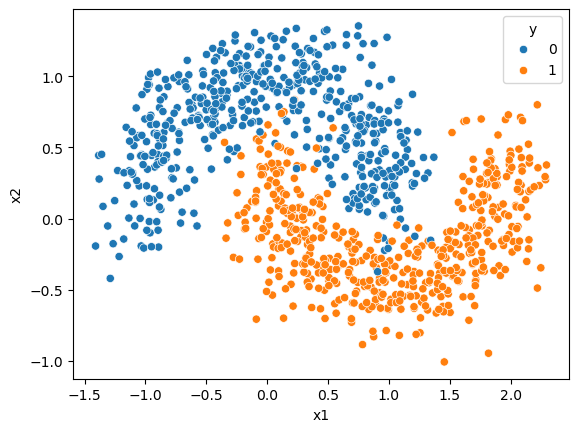

In [48]:
sns.scatterplot(x='x1', y='x2', hue='y', data=dataset)
plt.show()

In [49]:
x_a = dataset.iloc[:, :-1]
y_a = dataset['y']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, random_state=42, test_size=0.2)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [53]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
dt.score(x_train, y_train)*100


100.0

In [55]:
dt.score(x_test, y_test)*100

97.5

In [56]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [58]:
sv.score(x_train, y_train)*100

97.5

In [59]:
sv.score(x_test, y_test)*100

99.0

In [60]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [61]:
gnb.score(x_train, y_train)*100, gnb.score(x_test, y_test)*100

(86.125, 88.5)

In [62]:
from sklearn.ensemble import VotingClassifier

In [63]:
li = [('dt1', DecisionTreeClassifier()), ('sv1', SVC()), ('gnb1', GaussianNB())]

In [66]:
vc = VotingClassifier(li, weights=[5, 4, 7])
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[5, 4, 7])

In [67]:
vc.score(x_train, y_train)*100, vc.score(x_test, y_test)*100

(97.75, 98.5)

In [68]:
prd = {'dt':dt.predict(x_test), 'svm':sv.predict(x_test), 'gnb':gnb.predict(x_test), 'vc': vc.predict(x_test)}

In [71]:
dd = pd.DataFrame(prd)
dd.head(30)
# giving modes

,dt,svm,gnb,vc
0,1,1,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
5,1,1,1,1
6,1,1,0,1
7,0,0,0,0
8,0,0,0,0
9,1,1,1,1


# Max Voting, Averaging & Weighted Average Voting (Classification Practical)

In [72]:
dataset = pd.read_csv('E:\\cgpa.csv')
dataset.head(3)

,cgpa,package
0,2.75,13.07
1,3.90,19.73
2,3.46,17.59


In [73]:
x = dataset.iloc[:,:-1]
y = dataset['package']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(90.74656653283868, 87.00262792989442)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Bagging
## Bagging met-estimator
## Random Forest
## Classification Data

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
bg = BaggingClassifier(estimator=SVC(), n_estimators=30)
bg.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=30)

In [88]:
bg.score(x_train, y_train)*100, bg.score(x_test, y_test)*100

(97.375, 99.0)

In [89]:
sv = SVC()
sv.fit(x_train, y_train)
sv.score(x_test, y_test)*100

99.0

In [91]:
sv.score(x_train, y_train)*100

97.5